**Урок 2**. Посвящен изучению логической структуры рисунка в matplotlib и раскрывает особенности работы с элементами рисунка разных иерархических уровней.

Итак, вспоминаем Урок 1. Практически все задачи, связанные с построением графиков, можно решить, используя возможности, которые предоставляет модуль **pyplot**.

Для построения графика используется функция **plot()**. В самом минимальном варианте её можно использовать без параметров:

[]

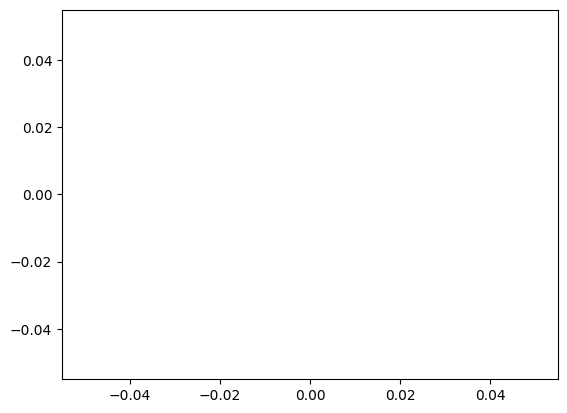

In [2]:
import matplotlib.pyplot as plt

plt.plot()

Если в качестве параметра функции **plot()** передать список, то значения из этого списка будут отложены по **оси ординат** (ось y), а по **оси абсцисс** (ось x) будут отложены индексы элементов массива:

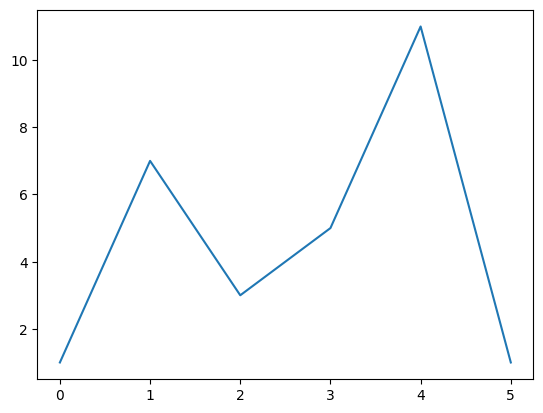

In [3]:
plt.plot([1, 7, 3, 5, 11, 1])

Для того чтобы задать значения по осям X и Y, необходимо в **plot()** передать **два списка**:

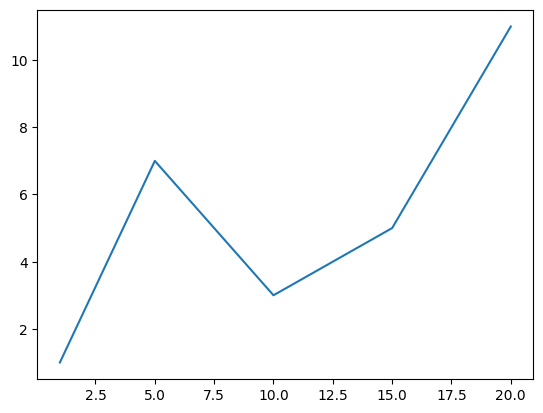

In [4]:
plt.plot([1, 5, 10, 15, 20], [1, 7, 3, 5, 11])

В части текстового наполнения при построении графика выделяют следующие составляющие:
*   заголовок поля (**title**);
*   заголовок фигуры (**suptitle**);
*   подписи осей (**xlabel, ylabel**);
*   текстовый блок на поле графика (**text**), либо на фигуре (**figtext**);
*   аннотация (**annotate**) – текст с указателем.

У каждого элемента, который содержит текст, помимо специфических параметров, отвечающих за его настройку, есть параметры класса **matplotlib.text.Text**, которые открывают доступ к большому числу настроек внешнего вида и расположения текстового элемента.


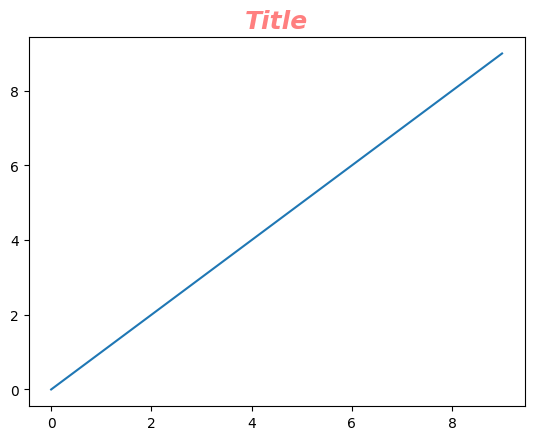

In [5]:
# Давайте начнем с заголовка
# Текст заголовка устанавливается с помощью функции title()

plt.title('Title', alpha=0.5, color='r', fontsize=18, fontstyle='italic', fontweight='bold', linespacing=10)
plt.plot(range(0,10), range(0,10)); # генерируем целые числа от 0 до 10, но не включая 10.

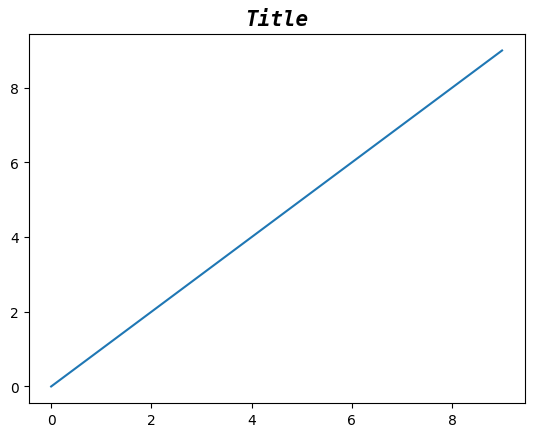

In [6]:
from matplotlib.font_manager import FontProperties # Модуль для поиска, управления и использования шрифтов.

plt.title('Title', fontproperties=FontProperties(family='monospace',  # [ 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ]
                                                 style='italic',      # [ 'normal' | 'italic' | 'oblique' ]
                                                 weight='heavy',      # [ 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight']
                                                 size=15))            # размер шрифта
plt.plot(range(0,10), range(0,10));

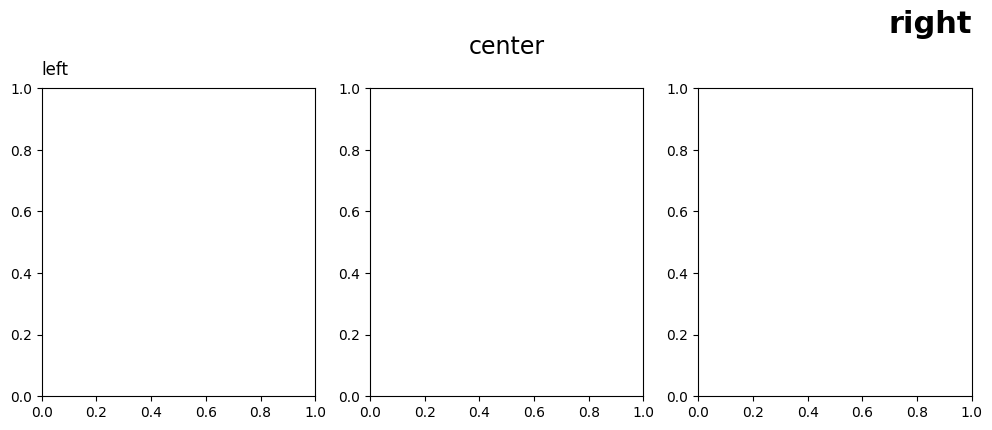

In [7]:
# Функция title() также поддерживает в качестве аргументов свойства класса Text
# Различное оформление заголовка

weight=['light', 'regular', 'bold']
plt.figure(figsize=(12, 4))
for i, lc in enumerate(['left', 'center', 'right']):
 plt.subplot(1, 3, i+1)
 plt.title(label=lc, loc=lc, fontsize=12+i*5, fontweight=weight[i],
 pad=10+i*15)

При работе с pyplot, для установки подписей осей графика, используются функции **labelx()** и **labely()**, при работе с объектом **Axes** – функции **set_xlabel()** и **set_ylabel()**.

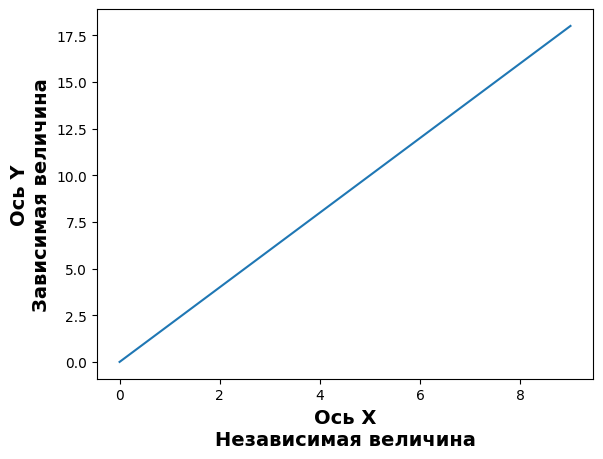

In [8]:
x = [i for i in range(10)]
y = [i*2 for i in range(10)]

plt.plot(x, y)

# Зададим подписи осей, используем некоторые из дополнительных свойств для настройки внешнего вида:
plt.xlabel('Ось X\nНезависимая величина', fontsize=14, fontweight='bold')
plt.ylabel('Ось Y\nЗависимая величина', fontsize=14, fontweight='bold');

За размещение текста на поле графика отвечает функция **text()**.
В простейшем варианте использование **text()** будет выглядеть так:

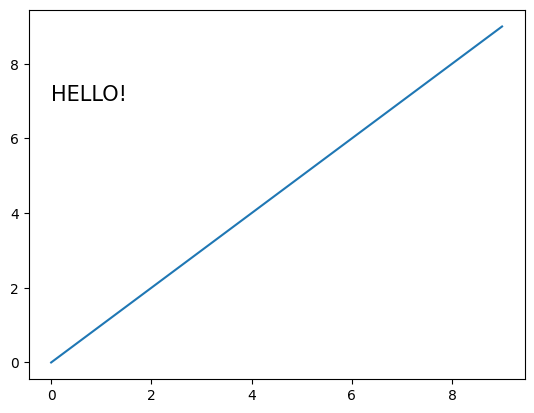

In [9]:
plt.text(0, 7, 'HELLO!', fontsize=15)
plt.plot(range(0,10), range(0,10));

Для надписи можно задать **выравнивание**, **позицию**, **вращение** и **z-порядок**.

Если требуется более тонкая настройка с указанием цвета, толщины, типа рамки, цвета основной заливки и т.п., то используйте параметр **bbox**, его значение – это словарь, ключами которого являются свойства класса **patches.FancyBboxPatch**

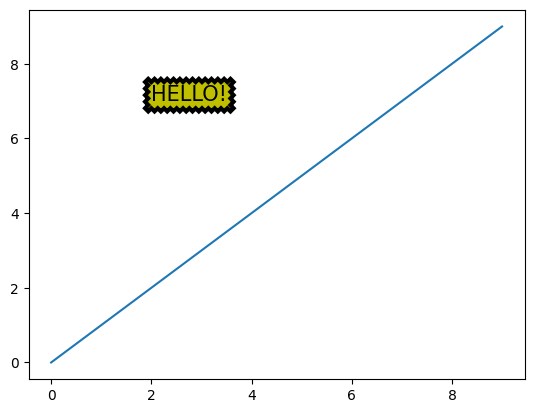

In [10]:
# Используем свойства класса Text для модификации предыдущего представления
bbox_properties=dict(boxstyle='Sawtooth, pad=0.3',        # стиль рамки
                     ec='k',                              # цвет границы рамки
                     fc='y',                              # цвет заливки
                     ls='-',                              # стиль линии рамки
                     lw=3)                                # толщина линии

plt.text(2, 7, 'HELLO!', fontsize=15, bbox=bbox_properties)
plt.plot(range(0,10), range(0,10));

Инструмент **Аннотация** позволяет установить текстовый блок с заданным содержанием и стрелкой для указания на конкретное место на графике. Для создания аннотации используется функция **annotate()**

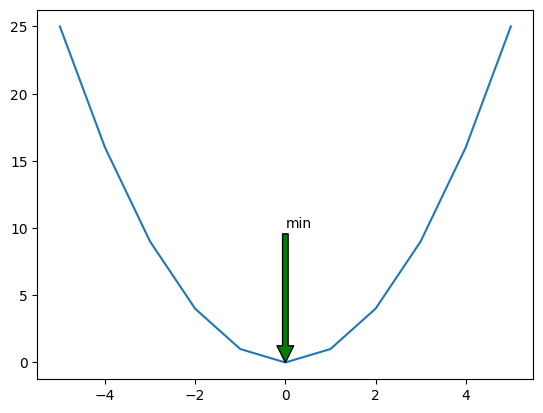

In [11]:
import math
x = list(range(-5, 6))
y = [i**2 for i in x]

plt.annotate('min',             # Текст аннотации
             xy=(0, 0),         # Координаты места, на которое будет указывать стрелка
             xycoords='data',   # Система координат, в которой определяется расположение указателя (в нашем примере - Декартова)
             xytext=(0, 10),    # Координаты расположения текстовой надписи
             textcoords='data', # Система координат, в которой определяется расположение текстового блока
             arrowprops=dict(facecolor='g'))  # Параметры отображения стрелки. Имена этих параметров (ключи словаря)
                                              # являются параметрами конструктора объекта класса FancyArrowPatch
plt.plot(x, y);

Рассмотрим настройку внешнего вида **стрелки аннотации**.

За конфигурирование отображения стрелки отвечает параметр **arrowprops**, который принимает в качестве значения словарь, ключами которого являются параметры конструктора класса **FancyArrowPatch**, из них выделим два: **arrowstyle** (отвечает за стиль стрелки) и **connectionstyle** (отвечает за стиль соединительной линии).

Доступные стили стрелок демонстрирует следующий код:


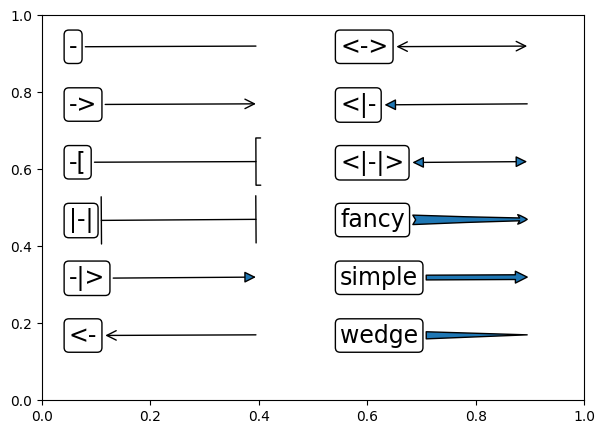

In [12]:
plt.figure(figsize=(7,5))

# Типы стрелок
arrows = ['-', '->', '-[', '|-|', '-|>', '<-', '<->', '<|-', '<|-|>', 'fancy', 'simple', 'wedge']

bbox_properties=dict(boxstyle='round,pad=0.2', ec='k', fc='w', ls='-', lw=1)

ofs_x = 0
ofs_y = 0

for i, ar in enumerate(arrows):
 if i == 6: ofs_x = 0.5
 plt.annotate(ar, xy=(0.4+ofs_x, 0.92-ofs_y),
                xycoords='data', xytext=(0.05+ofs_x, 0.9-ofs_y), textcoords='data',
                fontsize=17, bbox=bbox_properties, arrowprops=dict(arrowstyle=ar))
 if ofs_y == 0.75: ofs_y = 0
 else: ofs_y += 0.15

**Стиль соединительной линии** – параметр **connectionstyle**.

Данный параметр задаёт стиль линии, которая соединяет точки **xy** и **xycoords**.

В качестве значения может принимать объект класса ConnectionStyle или строку, в которой указывается стиль линии соединения с параметрами, перечисленными через запятую.

Код ниже демонстрирует стили соединительной линии.


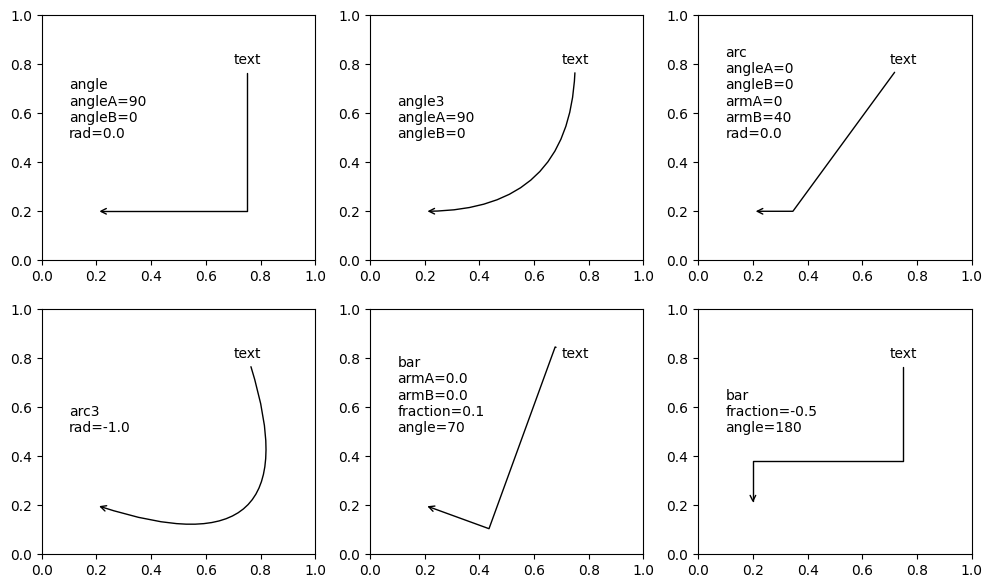

In [21]:
import math
fig, axs = plt.subplots(2, 3, figsize=(12, 7))
conn_style=[
'angle,angleA=90,angleB=0,rad=0.0','angle3,angleA=90,angleB=0','arc,angleA=0,angleB=0,armA=0,armB=40,rad=0.0',
'arc3,rad=-1.0','bar,armA=0.0,armB=0.0,fraction=0.1,angle=70','bar,fraction=-0.5,angle=180']
for i in range(2):
  for j in range(3):
   axs[i, j].text(0.1, 0.5, '\n'.join(conn_style[i*3+j].split(',')))
   axs[i, j].annotate('text', xy=(0.2, 0.2), xycoords='data',
   xytext=(0.7, 0.8), textcoords='data', arrowprops=dict(arrowstyle='->',
   connectionstyle=conn_style[i*3+j]))

Как мы уже знаем, для отображения **легенды** на графике используется функция **legend()**.

Text(15, 4, 'grow up!')

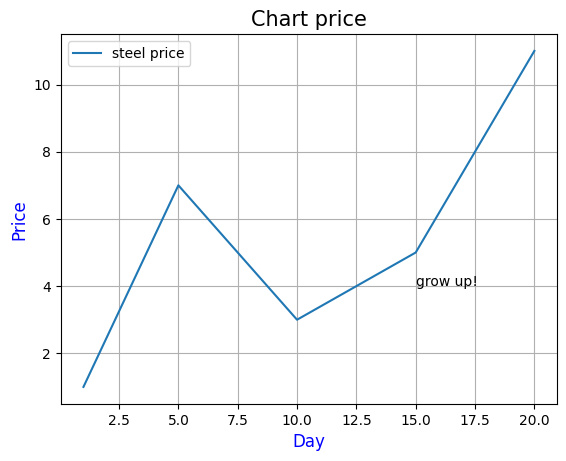

In [14]:
x = [1, 5, 10, 15, 20]
y = [1, 7, 3, 5, 11]

plt.plot(x, y, label='steel price')
plt.title('Chart price', fontsize=15)
plt.xlabel('Day', fontsize=12, color='blue')
plt.ylabel('Price', fontsize=12, color='blue')
plt.legend()
plt.grid(True)
plt.text(15, 4, 'grow up!')

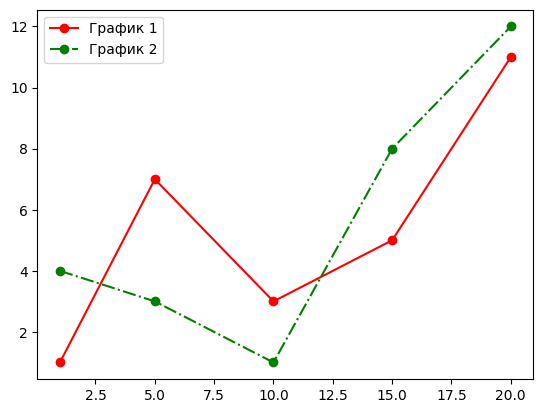

In [15]:
x = [1, 5, 10, 15, 20]
y1 = [1, 7, 3, 5, 11]
y2 = [4, 3, 1, 8, 12]

# В качестве меток для легенды будут использоваться метки, указанные в функциях построения графиков (параметр label):
plt.plot(x, y1, 'o-r', label='График 1')
plt.plot(x, y2, 'o-.g', label='График 2')
plt.legend()

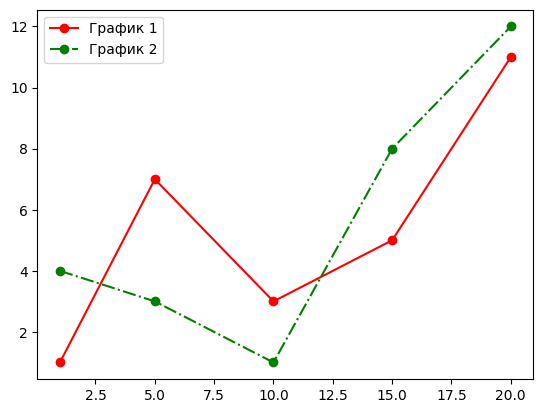

In [16]:
plt.plot(x, y1, 'o-r')
plt.plot(x, y2, 'o-.g')

# Самостоятельно указываем текстовую метку для отображаемых данных:
plt.legend(['График 1', 'График 2'])

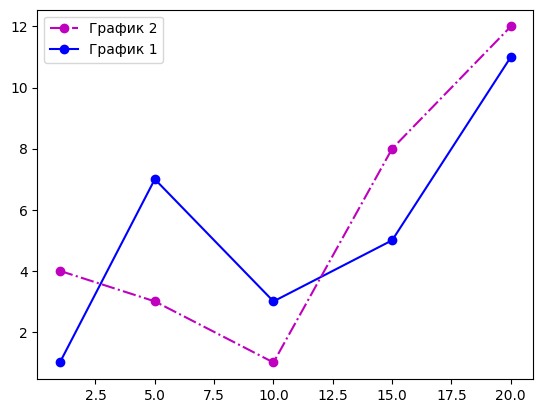

In [17]:
line1, = plt.plot(x, y1, 'o-b')
line2, = plt.plot(x, y2, 'o-.m')

# Можно вручную указать соответствие линий и текстовых меток
plt.legend((line2, line1), ['График 2', 'График 1'])

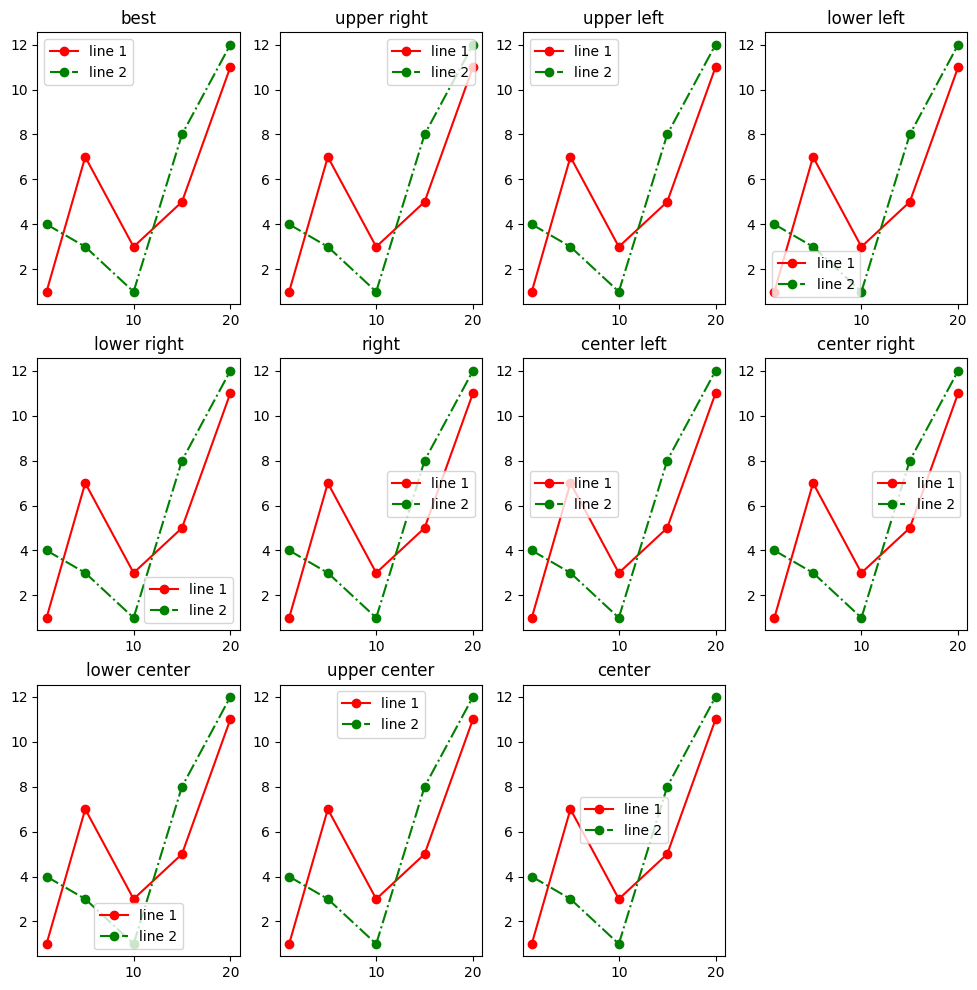

In [18]:
# Место расположения легенды определяется параметром loc, который может принимать одно из значений:
locs = ['best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right',
        'lower center', 'upper center', 'center']
plt.figure(figsize=(12, 12))
for i in range(3):
 for j in range(4):
  if i*4+j < 11:
   plt.subplot(3, 4, i*4+j+1)
   plt.title(locs[i*4+j])
   plt.plot(x, y1, 'o-r', label='line 1')
   plt.plot(x, y2, 'o-.g', label='line 2')
   plt.legend(loc=locs[i*4+j])
  else:
   break

Для более гибкого управления расположением легенды можно воспользоваться параметром **bbox_to_anchor** функции **legend()**:

  bbox_to_anchor = (x, y, width, height)

  bbox_to_anchor = (x, y)
  
где **x**, **y** – это координаты расположения легенды; **width** – ширина; **height** – высота.

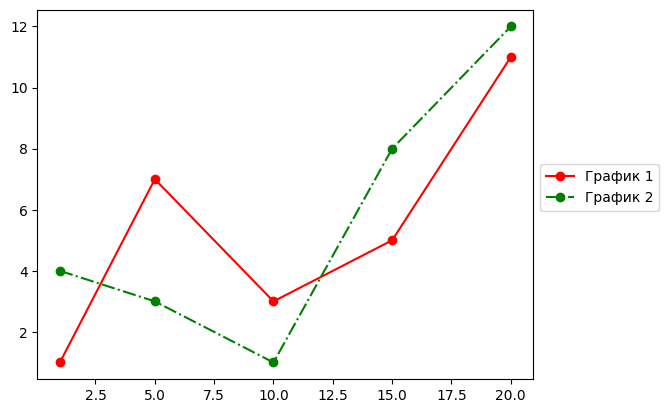

In [19]:
plt.plot(x, y1, 'o-r', label='График 1')
plt.plot(x, y2, 'o-.g', label='График 2')
plt.legend(bbox_to_anchor=(1, 0.6));

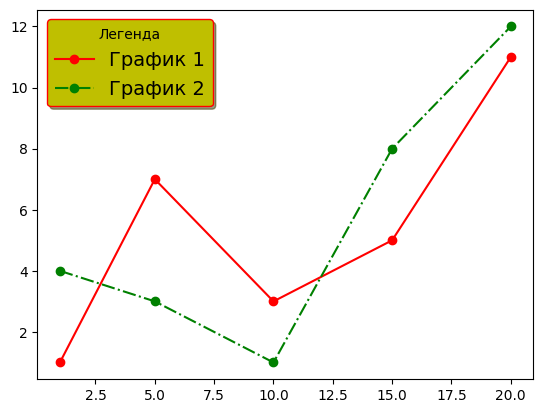

In [20]:
# Дополнительные параметры настройки отображения легенды
plt.plot(x, y1, 'o-r', label='График 1')    # сплошная красная линия с круглыми маркерами
plt.plot(x, y2, 'o-.g', label='График 2')   # штрих-пунктирная зеленая линия с круглыми маркерами
plt.legend(fontsize=14,         # размер текста
           shadow=True,         # с тенью
           framealpha=1,        # Прозрачность фона легенды
           facecolor='y',       # цвет заливки - зеленый
           edgecolor='r',       # цвет рамки - красный
           title='Легенда');